In [1]:
!pip -q install seaborn tqdm


In [1]:
import os, json, re, math
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="colorblind")
plt.rcParams.update({
    "figure.dpi": 140,
    "font.size": 9,            # base font
    "axes.titlesize": 10,
    "axes.labelsize": 9,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.fontsize": 8,
})

SEED = 42
np.random.seed(SEED)


In [17]:
import os
import json
import numpy as np
import pandas as pd

SYNTH_CLASSIF_JSONL = "../data/synthetic/synthetic_data_for_classification.jsonl"
SYNTH_CONTRAST_JSONL = "../data/synthetic/synthetic_data_for_contrastive_learning.jsonl"

REAL_ES_EN = "../resources/plots_es_en.autotrain.csv"   # columns: plots_es_en, plots_en
REAL_PT_EN = "../resources/plots_pt_en.autotrain.csv"   # columns: plots_pt_en, plots_en  (you repaired it)
REAL_FR_EN = "../resources/plots_fr_en.autotrain.csv"
REAL_ALL_EN = "../resources/plots_all_langs_en.autotrain.csv"

MASK_ES_EN = "../resources/plots_es_en.autotrain_NE_masked.csv"   # columns: plots_es_en, plots_en
MASK_PT_EN = "../resources/plots_pt_en.autotrain_NE_masked.csv"   # columns: plots_pt_en, plots_en  (you repaired it)
MASK_FR_EN = "../resources/plots_fr_en.autotrain_NE_masked.csv"
MASK_ALL_EN = "../resources/plots_all_langs_en.autotrain_NE_masked.csv"

def load_jsonl(path):
    items = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line:
                items.append(json.loads(line))
    return pd.DataFrame(items)


In [4]:
df_synth_cls = load_jsonl(SYNTH_CLASSIF_JSONL) if os.path.exists(SYNTH_CLASSIF_JSONL) else None
df_synth_ctr = load_jsonl(SYNTH_CONTRAST_JSONL) if os.path.exists(SYNTH_CONTRAST_JSONL) else None

df_synth_cls.head()

,model_name,anchor_text,text_a,text_b,text_a_is_closer
0,meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo,"A mysterious individual, known only by their a...","In the coastal city of Tidal Cove, a reclusive...","In the secluded hamlet of Ravenshire, a myster...",False
1,gpt-4o,A mysterious drifter arrives in the lawless fr...,"In a sprawling, rain-soaked city, a quiet mech...",A lone wanderer arrives in the turbulent minin...,False
2,OpenAI GPT4o Mini,"A team of paranormal investigators, led by sea...","In a bustling modern city, a group of amateur ...","A group of spectral researchers, led by experi...",False
3,OpenAI GPT 5 Chat,A prolonged drought devastates a rural farming...,A severe heatwave grips the remote farming set...,"In a remote coastal town, a series of mysterio...",True
4,meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo,The film revolves around a Marine who is sever...,The film follows Gunnery Sergeant Ryder Thomps...,"In a dystopian future, Captain Rachel Kim, a r...",True


In [18]:
df_es_en = pd.read_csv(REAL_ES_EN) if os.path.exists(REAL_ES_EN) else None
df_pt_en = pd.read_csv(REAL_PT_EN) if os.path.exists(REAL_PT_EN) else None
df_fr_en = pd.read_csv(REAL_FR_EN) if os.path.exists(REAL_FR_EN) else None
df_all_en = pd.read_csv(REAL_ALL_EN) if os.path.exists(REAL_FR_EN) else None

df_fr_en.head()

,plots_fr_en,plots_en
0,"In the 1920s, Rudy Hickman (Gene Wilder) is fi...","In the silent film era, Rainbow Studios execu..."
1,A ship leaves Hong Kong harbor carrying a carg...,"Alan Gaskell (Clark Gable) is an abrasive, gam..."
2,Iris is a young woman caring for her younger b...,Iris is a young woman who is desperately tryin...
3,"1880 in Arizona. Griff Bonnel, accompanied by ...","In the 1880s, Griff Bonnell, and his brothers,..."
4,Jenny Parker and Lola Perez are two completely...,Jenny Parker and Lola Perez are teenagers wit...


In [9]:
df_pt_en.head(1)

,plots_pt_en,plots_en
0,The stressed-out and valiant English merchant ...,"Alan Gaskell (Clark Gable) is an abrasive, gam..."


In [10]:
df_es_en.head(1)

,plots_es_en,plots_en
0,A ship commanded by Captain Alan Gaskell (Clar...,"Alan Gaskell (Clark Gable) is an abrasive, gam..."


In [6]:
df_es_en.columns, df_pt_en.columns

(Index(['plots_es_en', 'plots_en'], dtype='object'),
 Index(['plots_pt_en', 'plots_en'], dtype='object'))

In [11]:
len(df_es_en), len(df_pt_en), len(df_fr_en)

(3644, 7107, 17630)

In [19]:
len(df_all_en)

28381

In [20]:
def clean_cols(df):
    df = df.copy()
    df.columns = [str(c).strip().rstrip(";") for c in df.columns]
    return df

if df_es_en is not None:
    df_es_en = clean_cols(df_es_en)

if df_pt_en is not None:
    df_pt_en = clean_cols(df_pt_en)

if df_fr_en is not None:
    df_fr_en = clean_cols(df_fr_en)
if df_all_en is not None:
    df_all_en = clean_cols(df_all_en)

In [13]:
len(df_es_en), len(df_pt_en), len(df_fr_en)

(3644, 7107, 17630)

In [21]:
len(df_all_en)

28381

In [22]:
len(df_es_en) + len(df_pt_en) + len(df_fr_en)

28381

In [16]:
len(df_es_en) + len(df_pt_en) + len(df_fr_en)

28381

In [25]:
DEV_JSONL = "../data/dev_track_a.jsonl"  # <-- change path/name if needed

def load_jsonl_records(path):
    items = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line:
                items.append(json.loads(line))
    return pd.DataFrame(items)

df_dev = load_jsonl_records(DEV_JSONL) if os.path.exists(DEV_JSONL) else None

if df_dev is None:
    print(f"DEV file not found: {DEV_JSONL}")
else:
    needed = {"anchor_text", "text_a", "text_b", "text_a_is_closer"}
    if not needed.issubset(df_dev.columns):
        raise ValueError(
            f"DEV JSONL missing columns {needed - set(df_dev.columns)}. "
            f"Got: {df_dev.columns.tolist()}"
        )

    print("df_dev shape:", df_dev.shape)

df_dev.head(3)

df_dev shape: (200, 4)


,anchor_text,text_a,text_b,text_a_is_closer
0,The book follows an international organization...,The old grandmother Tina arrives in town to at...,The nano-plague that poisoned Earth's water su...,False
1,"Glenn Tyler (Elvis Presley), a childish 25-yea...","Bill Babbitt supported the death penalty, unti...",A white-collar suburban father Kyle (Fran Kran...,True
2,Signaller Charles Plumpick (Bates) is a kilt-w...,"Sid, Russ and Jerry are three wannabe criminal...",Brendan Byers III is a rich playboy who enlist...,False


In [56]:
import numpy as np
import pandas as pd

def normalize_all_sources(df: pd.DataFrame, source_name: str, seed: int = 42) -> pd.DataFrame:
    """
    Output schema (always):
      ['source', 'anchor', 'similar', 'dissimilar', 'label']
    """
    rng = np.random.default_rng(seed)
    df = df.copy().reset_index(drop=True)

    df.columns = [str(c).strip().rstrip(";") for c in df.columns]

    def _good_text_series(s: pd.Series) -> pd.Series:
        """True for non-null, non-empty, and not 'nan/none/null'."""
        s0 = s  # keep raw (with NaNs) for notna()
        s1 = s.astype(str).str.strip()
        bad = {"", "nan", "none", "null", "na", "n/a"}
        return s0.notna() & (~s1.str.lower().isin(bad))

    anchor_col = next((c for c in ["anchor_text", "plots_en"] if c in df.columns), None)
    movie_sim_cols = [c for c in ["plots_es_en", "plots_pt_en", "plots_fr_en", "plots_lang_en"] if c in df.columns]

    if anchor_col is not None and len(movie_sim_cols) > 0:
        outputs = []
        anchor_raw = df[anchor_col]

        for sim_col in movie_sim_cols:
            sim_raw = df[sim_col]

            mask = _good_text_series(anchor_raw) & _good_text_series(sim_raw)

            anchor_f = anchor_raw[mask].astype(str).str.strip().to_numpy()
            sim_f = sim_raw[mask].astype(str).str.strip().to_numpy()

            n = len(sim_f)
            if n < 2:
                continue

            idx = np.arange(n)
            neg_idx = rng.permutation(idx)
            while np.any(neg_idx == idx):
                neg_idx = rng.permutation(idx)

            outputs.append(pd.DataFrame({
                "source": f"{source_name}_{sim_col.replace('plots_', '')}",
                "anchor": anchor_f,
                "similar": sim_f,
                "dissimilar": sim_f[neg_idx],
                "label": True,
            }))

        if not outputs:
            raise ValueError(
                f"{source_name}: found movie columns but no usable rows after filtering. "
                f"Columns: {list(df.columns)}"
            )

        return pd.concat(outputs, ignore_index=True)

    if {"anchor_story", "similar_story", "dissimilar_story"}.issubset(df.columns):
        return pd.DataFrame({
            "source": source_name,
            "anchor": df["anchor_story"].astype(str),
            "similar": df["similar_story"].astype(str),
            "dissimilar": df["dissimilar_story"].astype(str),
            "label": True,
        })

    if {"anchor_text", "text_a", "text_b", "text_a_is_closer"}.issubset(df.columns):
        a_is_closer = df["text_a_is_closer"].astype(bool).to_numpy()
        a = df["text_a"].astype(str).to_numpy()
        b = df["text_b"].astype(str).to_numpy()

        similar = np.where(a_is_closer, a, b)
        dissimilar = np.where(a_is_closer, b, a)

        return pd.DataFrame({
            "source": source_name,
            "anchor": df["anchor_text"].astype(str),
            "similar": similar,
            "dissimilar": dissimilar,
            "label": True,
        })

    raise ValueError(
        f"{source_name}: unsupported schema. Columns found: {list(df.columns)}"
    )

In [61]:
dfs = []

df_mask_es_en = pd.read_csv(MASK_ES_EN) if os.path.exists(MASK_ES_EN) else None
df_mask_pt_en = pd.read_csv(MASK_PT_EN) if os.path.exists(MASK_PT_EN) else None
df_mask_fr_en = pd.read_csv(MASK_FR_EN) if os.path.exists(MASK_FR_EN) else None
df_mask_all_en = pd.read_csv(MASK_ALL_EN) if os.path.exists(MASK_FR_EN) else None

df_mask_all_en.head()

,plots_lang_en,plots_en
0,"In the 1920s, PERSON (PERSON) is fired from hi...","In the silent film era, ORG executives figure..."
1,A ship leaves GPE harbor carrying a cargo of g...,"PERSON (PERSON) is an abrasive, gambling, capt..."
2,PERSON is a young woman caring for her younger...,PERSON is a young woman who is desperately try...
3,"1880 in GPE. PERSON, accompanied by his brothe...","In the 1880s, PERSON, and his brothers, PERSON..."
4,PERSON and PERSON are two completely different...,PERSON and PERSON are teenagers with opposite...


In [62]:
dfs = []

dfs.append(normalize_all_sources(df_synth_cls, "synthetic_classification"))
# dfs.append(normalize_all_sources(df_synth_ctr, "synthetic_contrastive"))
dfs.append(normalize_all_sources(df_all_en, "movie_plots"))
dfs.append(normalize_all_sources(df_mask_all_en, "movie_plots_ne_masked"))
dfs.append(normalize_all_sources(df_dev, "dev"))

# len(df_es_en) + len(df_pt_en) + len(df_fr_en)

df_all = pd.concat(dfs, ignore_index=True)
df_all["source"].value_counts()

source
movie_plots_lang_en              28381
movie_plots_ne_masked_lang_en    28381
synthetic_classification          1900
dev                                200
Name: count, dtype: int64

In [63]:
df_all.columns

Index(['source', 'anchor', 'similar', 'dissimilar', 'label'], dtype='object')

In [64]:
df_all.head()

,source,anchor,similar,dissimilar,label
0,synthetic_classification,"A mysterious individual, known only by their a...","In the secluded hamlet of Ravenshire, a myster...","In the coastal city of Tidal Cove, a reclusive...",True
1,synthetic_classification,A mysterious drifter arrives in the lawless fr...,A lone wanderer arrives in the turbulent minin...,"In a sprawling, rain-soaked city, a quiet mech...",True
2,synthetic_classification,"A team of paranormal investigators, led by sea...","A group of spectral researchers, led by experi...","In a bustling modern city, a group of amateur ...",True
3,synthetic_classification,A prolonged drought devastates a rural farming...,A severe heatwave grips the remote farming set...,"In a remote coastal town, a series of mysterio...",True
4,synthetic_classification,The film revolves around a Marine who is sever...,The film follows Gunnery Sergeant Ryder Thomps...,"In a dystopian future, Captain Rachel Kim, a r...",True


In [65]:
df_all.tail()

,source,anchor,similar,dissimilar,label
58857,dev,"The film, shot in cinéma vérité-style, depicts...",The film follows a divorced couple living in m...,Happily Ever After dissects the viability of f...,True
58858,dev,Dagwood is given a Great Dane in lieu of repay...,Blondie Bumstead is having trouble balancing t...,Wedding planner/caterer Max is staging a weddi...,True
58859,dev,God was giving the animals and man their durat...,A vulture hacks at the protagonist's feet unti...,An Icelandic man in his 40s lives with his mot...,True
58860,dev,Jan Schmidt-Garre depicts the life and work of...,"The film begins with Confucius as an old man, ...",The film revolves around the story of a young ...,True
58861,dev,The story concerns the darker side of a politi...,The film flashes back and forth between the 19...,"Suzanne Verrier, a dancer of mediocre talent a...",True


In [66]:
_word_re = re.compile(r"\w+")
_upper_word_re = re.compile(r"\b[A-Z][a-z]+\b")
_num_re = re.compile(r"\d+")

def tokenize(text):
    return _word_re.findall(text.lower())

def text_features(text):
    toks = tokenize(text)
    n_words = len(toks)
    n_chars = len(text)
    n_nums = len(_num_re.findall(text))
    # crude proxy for "named entities": capitalized words
    n_caps = len(_upper_word_re.findall(text))
    return n_chars, n_words, n_nums, n_caps

def jaccard(a, b):
    sa, sb = set(tokenize(a)), set(tokenize(b))
    if not sa and not sb:
        return 0.0
    return len(sa & sb) / max(1, len(sa | sb))

rows = []
for i, r in tqdm(df_all.iterrows(), total=len(df_all), desc="Extracting features"):
    anc = r["anchor"]
    a = r["similar"]
    b = r["dissimilar"]

    anc_c, anc_w, anc_nums, anc_caps = text_features(anc)
    a_c, a_w, a_nums, a_caps = text_features(a)
    b_c, b_w, b_nums, b_caps = text_features(b)

    rows.append({
        "source": r["source"],
        "label": r["label"],

        "anchor_words": anc_w,
        "similar_words": a_w,
        "dissimilar_words": b_w,

        "anchor_chars": anc_c,
        "similar_chars": a_c,
        "dissimilar_chars": b_c,

        "anchor_nums": anc_nums,
        "similar_nums": a_nums,
        "dissimilar_nums": b_nums,

        "anchor_caps": anc_caps,
        "similar_caps": a_caps,
        "dissimilar_caps": b_caps,

        "jac_anchor_similar": jaccard(anc, a),
        "jac_anchor_dissimilar": jaccard(anc, b),
        "jac_similar_dissimilar": jaccard(a, b),
    })

df_feat = pd.DataFrame(rows)
df_feat.head()

Extracting features: 100%|███████████████████████████████████████████████████████████████████████| 58862/58862 [00:16<00:00, 3659.92it/s]


,source,label,anchor_words,similar_words,dissimilar_words,anchor_chars,similar_chars,dissimilar_chars,anchor_nums,similar_nums,dissimilar_nums,anchor_caps,similar_caps,dissimilar_caps,jac_anchor_similar,jac_anchor_dissimilar,jac_similar_dissimilar
0,synthetic_classification,True,181,167,166,1139,1097,1087,0,0,0,18,17,20,0.371069,0.174603,0.145946
1,synthetic_classification,True,145,156,170,907,942,1049,0,0,0,7,7,12,0.230263,0.082474,0.096939
2,synthetic_classification,True,148,151,172,967,1000,1060,0,0,0,11,11,12,0.300613,0.188172,0.149485
3,synthetic_classification,True,124,132,157,818,874,978,0,0,0,6,12,7,0.189349,0.112903,0.088083
4,synthetic_classification,True,158,179,198,961,1081,1220,0,1,0,7,28,20,0.515873,0.248485,0.231214


In [67]:
def summarize(df_feat):
    g = df_feat.groupby("source")
    summary = g.agg(
        n=("source", "size"),
        pos_rate=("label", "mean"),

        anchor_words_mean=("anchor_words", "mean"),
        a_words_mean=("similar_words", "mean"),
        b_words_mean=("dissimilar_words", "mean"),

        caps_anchor_mean=("anchor_caps", "mean"),
        nums_anchor_mean=("anchor_nums", "mean"),

        jac_anchor_a_mean=("jac_anchor_similar", "mean"),
        jac_anchor_b_mean=("jac_anchor_dissimilar", "mean"),
        jac_a_b_mean=("jac_similar_dissimilar", "mean"),
    ).reset_index()

    for c in summary.columns:
        if c.endswith("_mean") or c in {"pos_rate"}:
            summary[c] = summary[c].map(lambda x: float(np.round(x, 4)))
    return summary

summary = summarize(df_feat)
display(summary)

,source,n,pos_rate,anchor_words_mean,a_words_mean,b_words_mean,caps_anchor_mean,nums_anchor_mean,jac_anchor_a_mean,jac_anchor_b_mean,jac_a_b_mean
0,dev,200,1.0,126.9950,129.2150,117.3350,19.6300,0.4550,0.1019,0.1044,0.0982
1,movie_plots_lang_en,28381,1.0,485.5986,153.0096,153.0096,77.5084,1.4228,0.1670,0.0692,0.0750
2,movie_plots_ne_masked_lang_en,28381,1.0,475.5520,149.0193,149.0193,28.6052,1.3685,0.1635,0.0803,0.0902
3,synthetic_classification,1900,1.0,150.2437,154.5021,168.0611,10.2016,0.1074,0.3260,0.1561,0.1445


In [68]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

FIG_DIR = "figures"
os.makedirs(FIG_DIR, exist_ok=True)

def _safe_name(s):
    return re.sub(r"[^a-zA-Z0-9_-]+", "_", s).strip("_").lower()

def kde_by_source(df, col, title, log=False, out_dir=FIG_DIR):
    plt.figure(figsize=(6,3))
    plot_df = df.copy()

    fname = f"kde_{col}"
    if log:
        plot_df[col] = np.log1p(plot_df[col])
        title += " (log1p)"
        fname += "_log1p"

    sns.kdeplot(
        data=plot_df,
        x=col,
        hue="source",
        common_norm=False
    )

    plt.title(title)
    plt.tight_layout()

    out_path = os.path.join(out_dir, f"{_safe_name(fname)}.png")
    plt.savefig(out_path, dpi=200)
    plt.show()
    plt.close()

def hist_by_source(df, col, title, bins=50, log=False, out_dir=FIG_DIR):
    plt.figure(figsize=(6,3))
    plot_df = df.copy()

    fname = f"hist_{col}"
    if log:
        plot_df[col] = np.log1p(plot_df[col])
        title += " (log1p)"
        fname += "_log1p"

    sns.histplot(
        data=plot_df,
        x=col,
        hue="source",
        bins=bins,
        element="step",
        stat="density",
        common_norm=False
    )

    plt.title(title)
    plt.tight_layout()

    out_path = os.path.join(out_dir, f"{_safe_name(fname)}.png")
    plt.savefig(out_path, dpi=200)
    plt.show()
    plt.close()

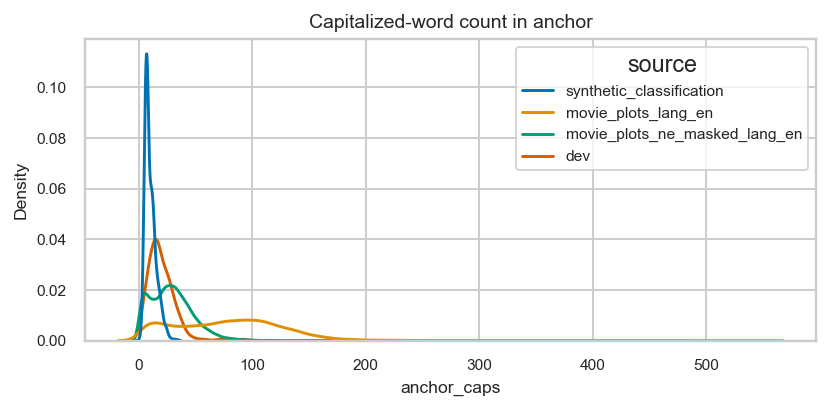

In [69]:
kde_by_source(df_feat, "anchor_caps", "Capitalized-word count in anchor")


#### Capitalized words.
The distribution of capitalized words clearly separates synthetic data from both development and movie-plot data. Synthetic anchors are sharply concentrated near zero, indicating an almost complete absence of named entities and proper nouns. In contrast, movie plots exhibit a broad distribution with a pronounced long tail, reflecting the narrative density of characters, places, and titles typical of real text. The development set falls in between but remains much closer to the movie plots than to the synthetic data, showing that entity presence is a strong marker of textual realism.


##### Masked Entities
The capitalized-word distributions show that named-entity masking substantially reshapes the surface structure of the movie plots. Unmasked movie plots retain a heavy-tailed distribution, reflecting frequent occurrences of character names, places, and titles. After masking, this tail collapses, and the distribution shifts closer to the development data, while remaining clearly distinct from the synthetic data, which is sharply concentrated near zero. Importantly, masking reduces entity-driven lexical signals without eliminating capitalization entirely, preserving some natural variability while preventing models from over-relying on proper nouns as shortcuts.


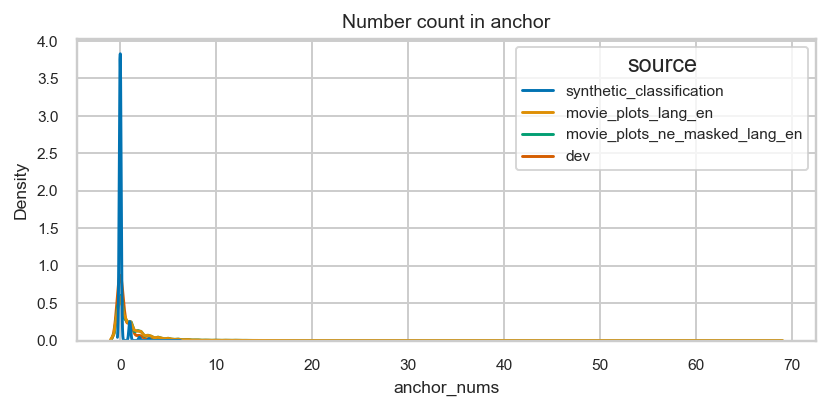

In [70]:
kde_by_source(df_feat, "anchor_nums", "Number count in anchor")


#### Numbers.
Numeric tokens are almost entirely absent from synthetic anchors, producing a near-degenerate distribution centered at zero. Both development and movie-plot data, however, contain nontrivial numeric content, with movie plots again showing a long tail corresponding to dates, sequel numbers, ages, and quantities. This absence of numbers in synthetic data removes an important source of natural variability and surface complexity, further distinguishing it from text that arises organically.


##### Masked Entities

A similar but more subtle effect appears for numeric tokens. Synthetic anchors remain almost entirely devoid of numbers, while unmasked movie plots show a long tail corresponding to dates, sequel numbers, and quantities. Masked movie plots reduce this tail but do not eliminate numeric content altogether, again aligning more closely with the development distribution. This suggests that masking removes entity-specific cues while retaining incidental numerical structure characteristic of natural text, leading to a better balance between realism and regularization.


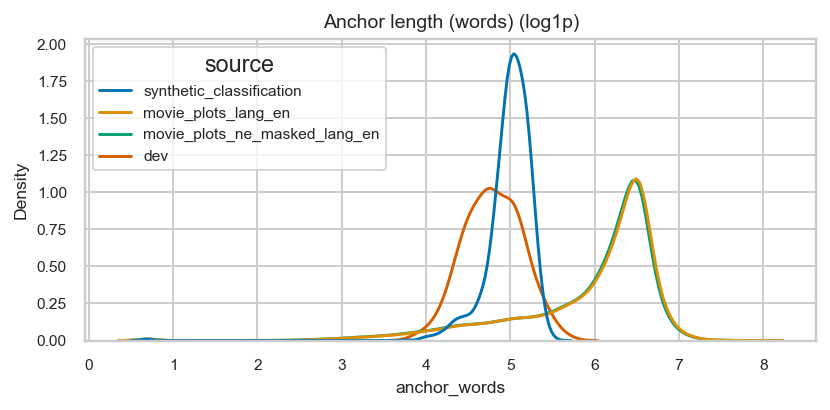

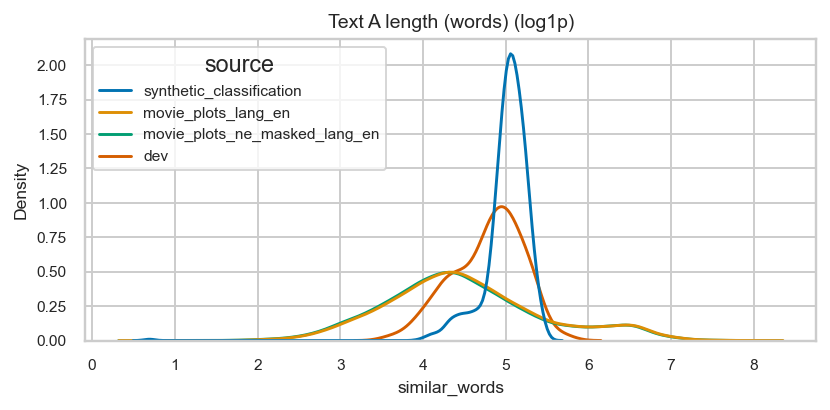

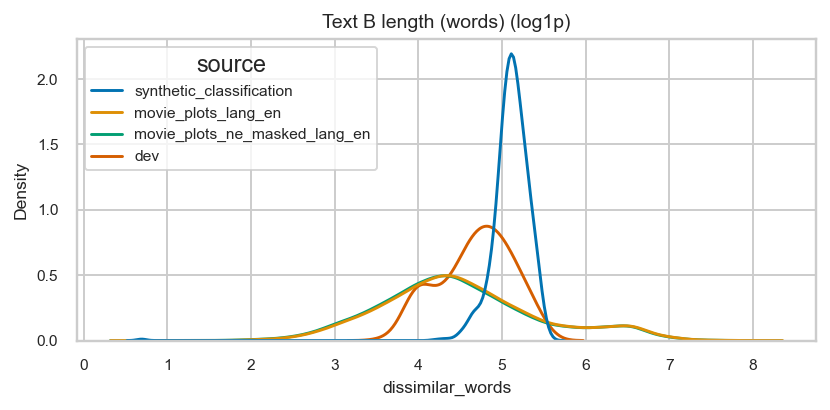

In [71]:
kde_by_source(df_feat, "anchor_words", "Anchor length (words)", log=True)
kde_by_source(df_feat, "similar_words", "Text A length (words)", log=True)
kde_by_source(df_feat, "dissimilar_words", "Text B length (words)", log=True)

#### Length.
Length distributions show a clear separation between synthetic and more realistic data. Synthetic anchors and paired texts exhibit extremely narrow distributions, even after log transformation, indicating strong length control and minimal variance. The development data displays greater spread but remains comparatively constrained, while movie plots are consistently longer and show broad, heavy-tailed distributions. This increased variability reflects the natural verbosity of narrative text and suggests that length itself becomes an implicit cue in the synthetic setting, potentially enabling shortcut learning that does not transfer well to real-world data.


##### Masked Entities

Length distributions are largely unaffected by masking, which is an important result. Both masked and unmasked movie plots remain significantly longer and more variable than synthetic data, with broad, heavy-tailed distributions even after log transformation. This indicates that the performance gains from masking do not come from trivial length normalization, but from changes in lexical and semantic structure. Synthetic data remains highly length-controlled, while masked movie plots preserve the natural verbosity and heterogeneity that models must handle at inference time.


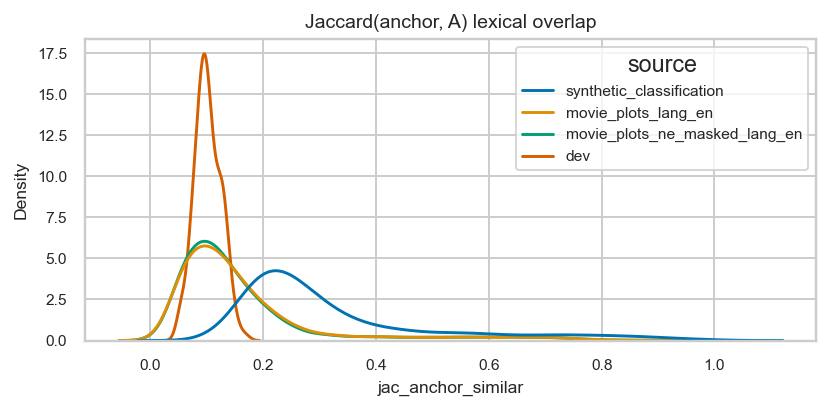

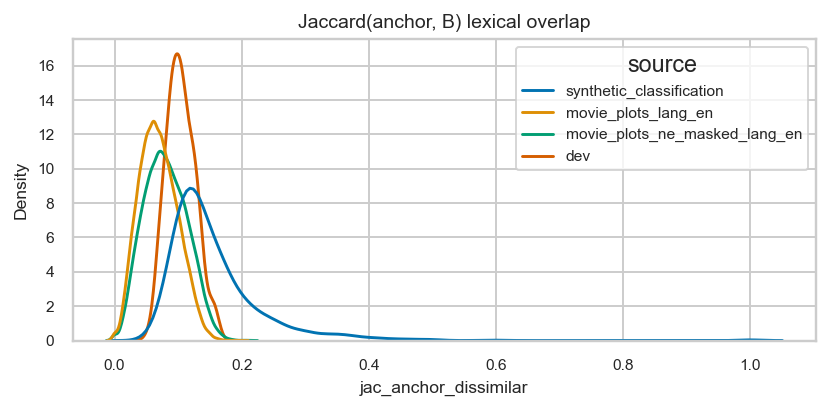

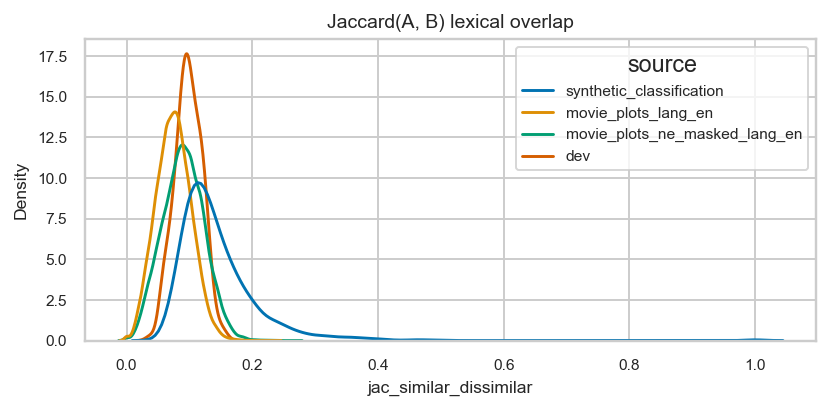

In [72]:

kde_by_source(df_feat, "jac_anchor_similar", "Jaccard(anchor, A) lexical overlap")
kde_by_source(df_feat, "jac_anchor_dissimilar", "Jaccard(anchor, B) lexical overlap")
kde_by_source(df_feat, "jac_similar_dissimilar", "Jaccard(A, B) lexical overlap")



#### Jaccard overlap
The Jaccard similarity distributions highlight systematic differences in lexical overlap across data sources. Synthetic data exhibits substantially higher overlap between anchors and their paired texts, including a pronounced right tail even for anchor–dissimilar pairs. This indicates that synthetic positives often rely on direct lexical reuse and that negatives are weakly contrasted, sharing residual vocabulary with the anchor. In contrast, both the development set and the movie plots show low and tightly concentrated overlap for dissimilar examples, reflecting genuinely unrelated text. For anchor–similar pairs, movie plots and dev data display moderate overlap without heavy tails, suggesting that similarity is primarily semantic rather than driven by shared surface forms. Overall, these patterns show that lexical overlap is a strong shortcut in synthetic data but a much weaker signal in more realistic text.



##### Masked Entities

Lexical overlap patterns reveal the clearest effect of named-entity masking. In unmasked movie plots, anchor–similar Jaccard scores are moderate and tightly distributed, reflecting semantic similarity with limited lexical reuse. After masking, these overlaps decrease further and become even more concentrated, indicating that similarity is no longer driven by shared entity names but by surrounding context. For anchor–dissimilar pairs, both masked and unmasked movie plots show low overlap with no heavy tail, in sharp contrast to synthetic data, where even dissimilar examples retain substantial lexical overlap. The masked condition therefore strengthens the contrastive signal by suppressing entity leakage while maintaining genuinely unrelated negatives.


### Data Types (conclusions from the plots)

#### Synthetic data.
Across all features—length, lexical overlap, capitalization, and numeric content—the synthetic data exhibits extreme regularity and constrained variance. In particular, Jaccard similarity scores reveal systematically higher lexical overlap between anchors and their paired texts, not only for similar examples but also for those designated as dissimilar. This indicates that synthetic positives often behave like paraphrases, while negatives retain residual vocabulary overlap with the anchor. Such overlap patterns simplify the discrimination task by allowing models to exploit shared surface forms rather than learning semantic relationships. Consequently, performance measured on synthetic data is likely to overestimate robustness and generalization to real-world text, where relatedness is less tightly coupled to lexical similarity.


#### Movie plots.
The movie plots data consistently displays the richest and most realistic distributions across all examined features. In terms of lexical overlap, Jaccard similarity scores remain low and tightly concentrated for anchor–dissimilar pairs, indicating that negative examples are genuinely unrelated rather than weakly contrasted. At the same time, anchor–similar overlap is moderate and lacks the heavy right tail observed in synthetic data, suggesting that similarity is driven by shared semantics rather than lexical reuse. Combined with greater length variability and substantially higher counts of entities and numeric expressions, these patterns show that the movie plots preserve the heterogeneity and narrative structure of natural text. As a result, they form a substantially harder and more realistic benchmark than synthetic data, clearly exposing the limitations of overly regular synthetic setups.

#### Conclusion.

Taken together, these results position the masked movie plots as an intermediate but optimal regime between synthetic and fully unmasked real text. Synthetic data is overly regular, lexically shallow, and structurally simplified, allowing models to exploit surface cues such as length and word overlap. Unmasked movie plots are fully realistic but contain strong entity-based shortcuts that can dominate learning. Masked movie plots preserve natural length variability and narrative structure while neutralizing entity-driven lexical overlap, forcing models to rely on relational and contextual cues instead. This explains why training on masked movie plots yields better performance: the data remains hard and realistic, but the most misleading shortcuts have been systematically removed.


In [73]:
import pandas as pd

cols = {
    "anchor_caps": "caps_median",
    "anchor_nums": "nums_median",
    "anchor_words": "anchor_len_median",
    "jac_anchor_similar": "jac_A_S_mean",
    "jac_anchor_dissimilar": "jac_A_D_mean",
}

def summarize(df):
    return pd.Series({
        "caps_median": df["anchor_caps"].median(),
        "nums_median": df["anchor_nums"].median(),
        "anchor_len_median": df["anchor_words"].median(),
        "jac_A_S_mean": df["jac_anchor_similar"].mean(),
        "jac_A_D_mean": df["jac_anchor_dissimilar"].mean(),
    })

table = (
    df_feat
    .groupby("source", observed=True)
    .apply(summarize)
    .reset_index()
)

table

/var/folders/q6/79qm4dq548s1b1nd29hfv_cm0000gn/T/ipykernel_17960/3789833437.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(summarize)


,source,caps_median,nums_median,anchor_len_median,jac_A_S_mean,jac_A_D_mean
0,dev,17.0,0.0,117.0,0.101923,0.104389
1,movie_plots_lang_en,79.0,1.0,528.0,0.167045,0.069172
2,movie_plots_ne_masked_lang_en,27.0,0.0,518.0,0.163492,0.080320
3,synthetic_classification,9.0,0.0,151.5,0.325963,0.156051


In [74]:
table_rounded = table.copy()
table_rounded[[
    "jac_A_S_mean",
    "jac_A_D_mean"
]] = table_rounded[[
    "jac_A_S_mean",
    "jac_A_D_mean"
]].round(3)

table_rounded

,source,caps_median,nums_median,anchor_len_median,jac_A_S_mean,jac_A_D_mean
0,dev,17.0,0.0,117.0,0.102,0.104
1,movie_plots_lang_en,79.0,1.0,528.0,0.167,0.069
2,movie_plots_ne_masked_lang_en,27.0,0.0,518.0,0.163,0.080
3,synthetic_classification,9.0,0.0,151.5,0.326,0.156


In [75]:
order = [
    "synthetic",
    "movie",
    "movie_masked",
    "dev"
]

table_rounded = (
    table_rounded
    .set_index("source")
    .loc[[s for s in order if s in table_rounded["source"].values]]
    .reset_index()
)

table_rounded

,source,caps_median,nums_median,anchor_len_median,jac_A_S_mean,jac_A_D_mean
0,dev,17.0,0.0,117.0,0.102,0.104


In [78]:
# LaTeX table with booktabs (paper-ready)
# Assumes you already created `table_rounded` (or `table`) from df_feat as in the previous snippet.

import pandas as pd

# If you only have `table`, uncomment:
# table_rounded = table.copy()
# table_rounded[["jac_A_S_mean","jac_A_D_mean"]] = table_rounded[["jac_A_S_mean","jac_A_D_mean"]].round(3)

# Optional: nicer column names for the paper
latex_df = table_rounded.rename(columns={
    "source": "Source",
    "caps_median": "Caps (median)",
    "nums_median": "Nums (median)",
    "anchor_len_median": "Anchor len (median)",
    "jac_A_S_mean": "Jaccard(A,S) (mean)",
    "jac_A_D_mean": "Jaccard(A,D) (mean)",
})

# Optional: row order (edit to match your actual `source` values)
order = ["synthetic", "movie", "movie_masked", "dev"]
if set(order).issubset(set(latex_df["Source"].unique())):
    latex_df = latex_df.set_index("Source").loc[order].reset_index()

latex_str = table.to_latex(
    index=False,
    escape=True,          # keep safe unless you put LaTeX in cells
    # booktabs=True,
    float_format="%.3f",  # will format numeric cols consistently
    caption="Summary statistics by data source: anchor structure and lexical overlap.",
    label="tab:summary_stats_by_source",
)

print(latex_str)

\begin{table}
\caption{Summary statistics by data source: anchor structure and lexical overlap.}
\label{tab:summary_stats_by_source}
\begin{tabular}{lrrrrr}
\toprule
source & caps\_median & nums\_median & anchor\_len\_median & jac\_A\_S\_mean & jac\_A\_D\_mean \\
\midrule
dev & 17.000 & 0.000 & 117.000 & 0.102 & 0.104 \\
movie\_plots\_lang\_en & 79.000 & 1.000 & 528.000 & 0.167 & 0.069 \\
movie\_plots\_ne\_masked\_lang\_en & 27.000 & 0.000 & 518.000 & 0.163 & 0.080 \\
synthetic\_classification & 9.000 & 0.000 & 151.500 & 0.326 & 0.156 \\
\bottomrule
\end{tabular}
\end{table}

